#Import necessary libraries

In [ ]:
#import necessary libraries
import pandas as pd
import numpy as np
import math
import operator
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Load the dataset

In [ ]:
data = pd.read_csv('/content/Medical Price Dataset.csv')
print(data.head)

<bound method NDFrame.head of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>


In [ ]:
data.columns

Index(['age', 'bmi', 'charges', 'children', 'region', 'sex', 'smoker'], dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   float64
 1   bmi       1338 non-null   float64
 2   charges   1338 non-null   float64
 3   children  1338 non-null   float64
 4   region    0 non-null      object 
 5   sex       0 non-null      object 
 6   smoker    0 non-null      object 
dtypes: float64(4), object(3)
memory usage: 73.3+ KB


In [ ]:
data.describe()

,age,bmi,charges,children
count,1.338000e+03,1.338000e+03,1.338000e+03,1.338000e+03
mean,-1.810543e-16,1.553275e-15,-9.724824e-17,-2.540735e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.509401e+00,-2.411110e+00,-1.003182e+00,-9.082741e-01
25%,-8.688299e-01,-7.161386e-01,-7.043871e-01,-9.082741e-01
50%,-1.473495e-02,-4.319265e-02,-3.210888e-01,-7.873775e-02
75%,8.393600e-01,6.609101e-01,2.782401e-01,7.507986e-01
max,1.764630e+00,3.684145e+00,4.170104e+00,3.239407e+00


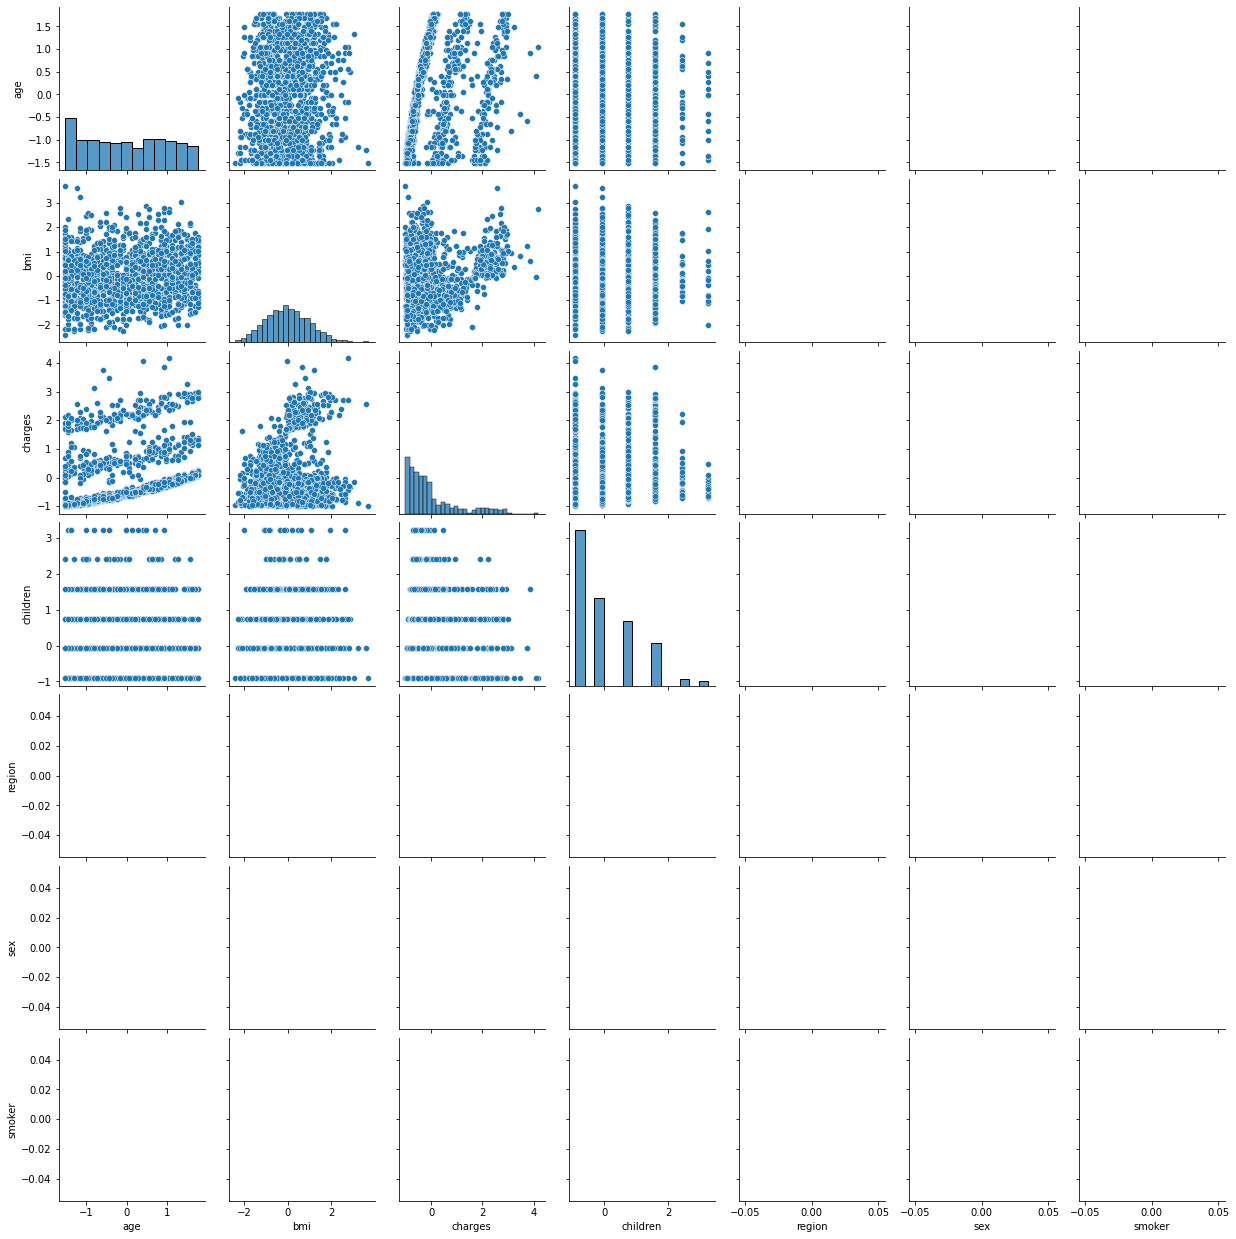

In [ ]:
sns.pairplot(data)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


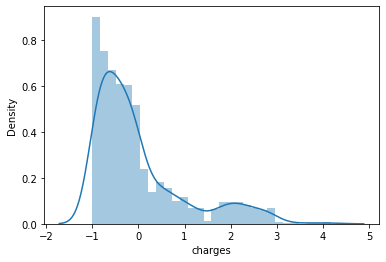

In [ ]:
  sns.distplot(data["charges"])

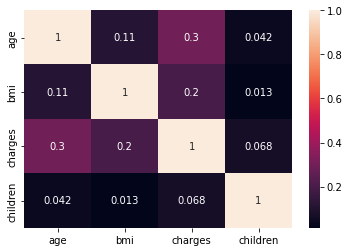

In [ ]:
sns.heatmap(data.corr(),annot=True)

In [ ]:
data['region'].value_counts()

KeyError: ignored

In [ ]:
sex_dummy = pd.get_dummies(data['sex'])
smoker_dummy = pd.get_dummies(data['smoker'])
region_dummy = pd.get_dummies(data['region'])

data = pd.concat([data,sex_dummy,smoker_dummy,region_dummy], axis=1)

data.rename(columns={'no': 'non-smoker','yes': 'nicotian'}, inplace=True)

In [ ]:
data = data.drop(['sex','smoker','region'], axis=1)

In [ ]:
data.head(10)

,age,bmi,charges,children
0,-1.438227,-0.453151,0.298472,-0.908274
1,-1.509401,0.509431,-0.953333,-0.078738
2,-0.797655,0.383164,-0.728402,1.580335
3,-0.441782,-1.305043,0.719574,-0.908274
4,-0.512957,-0.292447,-0.776512,-0.908274
5,-0.584132,-0.807354,-0.785615,-0.908274
6,0.483487,0.455316,-0.415345,-0.078738
7,-0.157084,-0.479388,-0.494543,1.580335
8,-0.157084,-0.136663,-0.566805,0.750799
9,1.479931,-0.790956,1.292543,-0.908274


In [ ]:
data = (data- data.mean())/data.std()
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


,age,bmi,charges,children,region,sex,smoker
0,-1.438227,-0.453151,0.298472,-0.908274,NaN,NaN,NaN
1,-1.509401,0.509431,-0.953333,-0.078738,NaN,NaN,NaN
2,-0.797655,0.383164,-0.728402,1.580335,NaN,NaN,NaN
3,-0.441782,-1.305043,0.719574,-0.908274,NaN,NaN,NaN
4,-0.512957,-0.292447,-0.776512,-0.908274,NaN,NaN,NaN


In [ ]:
#setting the matrixes
X = data.iloc[:,:4]
ones = np.ones([X.shape[0],1])
X = np.concatenate((ones,X),axis=1)

y = data.iloc[:,-1].values #.values converts it from pandas.core.frame.DataFrame to numpy.ndarray
theta = np.zeros([1,3])

#set hyper parameters
alpha = 0.01
iters = 1000

In [ ]:
#computecost
def computeCost(X,y,theta):
    tobesummed = np.power(((X @ theta.T)-y),2)
    return np.sum(tobesummed)/(2 * len(X))

In [ ]:

#gradient descent
def gradientDescent(X,y,theta,iters,alpha):
    cost = np.zeros(iters)
    for i in range(iters):
        theta = theta - (alpha/len(X)) * np.sum(X * (X @ theta.T - y), axis=0)
        cost[i] = computeCost(X, y, theta)
    
    return theta,cost

#running the gd and cost function
g,cost = gradientDescent(X,y,theta,iters,alpha)
print(g)

finalCost = computeCost(X,y,g)
print(finalCost)

ValueError: ignored

In [ ]:
#plot the cost
fig, ax = plt.subplots()  
ax.plot(np.arange(iters), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')